In [18]:
import pandas as pd
import re
import numpy as np

In [35]:
%store -r

In [36]:
display(df3.head())

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula
0,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
1,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
2,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
3,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,Unknown,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
4,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


In [37]:
df3.isnull().sum()

Date                      0
Type                      0
Country                   0
Area                      0
Location                  0
Activity                  0
Name                      0
Sex                       0
Age                       0
Injury                    0
Fatal (Y/N)               0
Time                      0
Species                   0
Investigator or Source    0
pdf                       0
href formula              0
dtype: int64

In [38]:
#Miramos Area a ver que tan limpio está
df3['Area'].value_counts()
[x for x in df3['Area'] if x != 'Unknown']
#parece que está lo suficientemente limpia

['California',
 'Georgia',
 'Hawaii',
 'New South Wales',
 'Colima',
 'New South Wales',
 'Pernambuco',
 'Florida',
 'Florida',
 'Florida',
 'Queensland',
 'South Carolina',
 'South Carolina',
 'Cornwall',
 'Westerm Australia',
 'Eastern Cape Province',
 'New South Wales',
 'Hua Hin',
 'Cocos Island',
 'Western Australia',
 'New South Wales',
 'Western Australia',
 'Western Australia',
 'Alifu Alifu Atoll',
 'Western Cape Province',
 'Hawaii',
 'Hua Hin',
 'Pernambuco',
 'Western Australia',
 'Western Australia',
 'New Providence',
 'Alagoas',
 'Eastern Cape Province',
 'Hawaii',
 'Western Australia',
 'Victoria',
 'Victoria',
 'KwaZulu-Natal',
 'New South Wales',
 'Victoria',
 'New South Wales',
 'Queensland',
 'Boi Island, Victoria',
 'Galapagos Islands',
 'Western Australia',
 'Western Australia',
 'Queensland',
 'New South Wales',
 'Fernando de Noronha',
 'Western Australia',
 'Hawaii',
 'California',
 'Sepang',
 'Cocos Island',
 'Cocos Island',
 'California',
 'Florida',
 'New Sou

In [39]:
df3['Activity'].value_counts()

Surfing                                                              971
Swimming                                                             869
Unknown                                                              547
Fishing                                                              431
Spearfishing                                                         333
                                                                    ... 
Fishing from market fishboat Sea Spray                                 1
Trying to catch a wounded bird                                         1
Surfing (pneumatic surfboard)                                          1
Swept out to sea by the tsunami, she clung  to a log for 24 hours      1
Swimming or paddle boarding                                            1
Name: Activity, Length: 1532, dtype: int64

In [57]:
import sys
sys.path.insert(1, 'input/lab-cleaning-pandas/src/formulas')
#no he sabido meter la fórmula
[x for x in df3['Activity'] if x != 'Unknown']
#aún así es una lista que parece estar limpia y se puede usar en el análisis

['Paddling',
 'Standing',
 'Surfing',
 'Surfing',
 'Free diving',
 'Kite surfing',
 'Swimming',
 'Fishing',
 'Walking',
 'Standing',
 'Feeding sharks',
 'Boogie boarding',
 'Swimming',
 'Fishing',
 'Feeding sharks',
 'Surfing',
 'Surfing',
 'Swimming',
 'Scuba diving',
 'Surfing',
 'Surfing',
 'Surfing',
 'Surfing',
 'Fishing',
 'Paddle-skiing',
 'Body boarding',
 'Swimming',
 'Swimming',
 'Surfing',
 'Surfing',
 'Surfing',
 'Fishing',
 'Windsurfing',
 'Swimming',
 'Surfing',
 'Stand-Up Paddleboarding',
 'Wading',
 'Swimming',
 'Surfing',
 'Scuba Diving',
 'Swimming',
 'Kayak fishing for sharks',
 'Walking',
 'Swimming',
 'Cleaning fish',
 'Snorkeling',
 'Spearfishing',
 'Spearfishing',
 'Diving',
 'Free diving',
 'Surfing',
 'Surfing',
 'Surfing',
 'Surfing',
 'Fishing / Wading',
 'Snorkeling',
 'Scuba Diving',
 'Scuba diving',
 '2 boats capsized',
 'Spearfishing',
 'Surfing',
 'Surfing',
 'Surfing',
 'Night bathing',
 'Snorkeling',
 'Surfing',
 'Stand-Up Paddleboarding',
 'Swimming',

In [58]:
#Como se introdujo en el documento 'clean.ipynb' la hipotesis era comprobar si en California la gente mueren más surfistas que ningún otro
df3 = df3.filter(['Area','Activity'])
is_california = (df3['Area'] == 'California')
df_california = df3[is_california]
df_california = df_california.reset_index()

In [59]:
df_california.shape
display(df_california)

,index,Area,Activity
0,0,California,Paddling
1,54,California,Surfing
2,60,California,Spearfishing
3,105,California,Kayaking / Fishing
4,116,California,Kayaking
...,...,...,...
285,5833,California,Bathing
286,6026,California,Hard hat diving
287,6194,California,Fishing for basking sharks
288,6230,California,"Free diving, collecting sand dollars"


<AxesSubplot:>

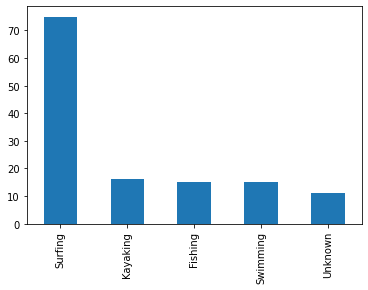

In [60]:
df_california['Activity'].value_counts().nlargest().plot.bar()

In [61]:
#Queda comprobado que los que más ataques recieben en California son los surfistas, seguidos de Kayaking y Pesca